In [67]:
!pip install geopy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from geopy import distance
sys.path.append('../scripts')
from helpers import Helper

Defaulting to user installation because normal site-packages is not writeable


Exploring Orders completed data

In [16]:
df_orders = pd.read_csv('../data/nb.csv')

In [36]:
# df_orders.head()

In [19]:
df_orders.isna().sum()

Trip ID                0
Trip Origin            0
Trip Destination       0
Trip Start Time     1651
Trip End Time          1
dtype: int64

In [20]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Trip ID           536020 non-null  int64 
 1   Trip Origin       536020 non-null  object
 2   Trip Destination  536020 non-null  object
 3   Trip Start Time   534369 non-null  object
 4   Trip End Time     536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB


In [21]:
df_orders.describe()

,Trip ID
count,5.360200e+05
mean,9.910221e+05
std,3.456364e+05
min,3.919960e+05
25%,6.935610e+05
50%,9.910085e+05
75%,1.281570e+06
max,1.637709e+06


In [22]:
df_orders.shape

(536020, 5)

Lets rename the column names to make it easier when storing to a database later

In [35]:
df_orders = df_orders.rename(columns={'Trip ID': 'trip_id', 
                    'Trip Origin': 'trip_origin', 
                    'Trip Destination': 'trip_destination', 
                    'Trip Start Time': 'trip_start_time', 
                    'Trip End Time': 'trip_end_time',})
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   trip_id           536020 non-null  int64 
 1   trip_origin       536020 non-null  object
 2   trip_destination  536020 non-null  object
 3   trip_start_time   534369 non-null  object
 4   trip_end_time     536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB


Separate the latitude and longitude from trip_origin and trip_destination columns

In [37]:
df_orders['trip_origin_lat'] = df_orders['trip_origin'].apply(lambda x: str(x).split(',')[0])
df_orders['trip_origin_long'] = df_orders['trip_origin'].apply(lambda y: str(y).split(',')[1])

In [39]:
# df_orders.head()
df_orders['trip_destn_lat'] = df_orders['trip_destination'].apply(lambda x: str(x).split(',')[0])
df_orders['trip_destn_long'] = df_orders['trip_destination'].apply(lambda y: str(y).split(',')[1])

In [41]:
df_orders.head(2)

,trip_id,trip_origin,trip_destination,trip_start_time,trip_end_time,trip_origin_lat,trip_origin_long,trip_destn_lat,trip_destn_long
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,6.508813001668548,3.37740316890347,6.650969799999999,3.3450307
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28,6.4316714,3.4555375,6.4280814653326,3.4721885847586


Find the distances between trip origin and trip destination

In [46]:
df_orders['trip_distance']=df_orders.apply(lambda x:distance.distance((x['trip_origin_lat'],x['trip_origin_long']), 
(x['trip_destn_lat'],x['trip_destn_long'])).km,axis=1)

In [49]:
df_orders.head()

,trip_id,trip_origin,trip_destination,trip_start_time,trip_end_time,trip_origin_lat,trip_origin_long,trip_destn_lat,trip_destn_long,distance
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,6.508813001668548,3.37740316890347,6.650969799999999,3.3450307,16.123451
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28,6.4316714,3.4555375,6.4280814653326,3.4721885847586,1.884305
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23,6.631679399999999,3.3388976,6.508324099999999,3.3590397,13.822393
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42,6.572757200000001,3.3677082,6.584881099999999,3.3614073,1.511034
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,6.6010417,3.2766339,6.4501069,3.3916154,20.984319


lets see if we can get an insight using the info on hand

<AxesSubplot:xlabel='trip_id', ylabel='distance'>

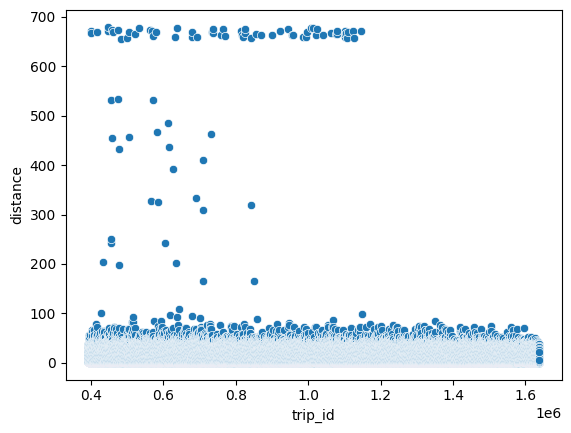

In [51]:
sns.scatterplot(y=df_orders['distance'],x=df_orders['trip_id'])

Drivers locations data

In [58]:
df_drivers = pd.read_csv('../data/driver_locations_during_request.csv')

In [60]:
df_drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   driver_id      1557740 non-null  int64  
 3   driver_action  1557740 non-null  object 
 4   lat            1557740 non-null  float64
 5   lng            1557740 non-null  float64
 6   created_at     0 non-null        float64
 7   updated_at     0 non-null        float64
dtypes: float64(4), int64(3), object(1)
memory usage: 95.1+ MB


In [61]:
df_drivers.isnull().sum()

id                     0
order_id               0
driver_id              0
driver_action          0
lat                    0
lng                    0
created_at       1557740
updated_at       1557740
dtype: int64

drop created_at and updated_at columns as they have no data 

In [62]:
cols = ['created_at','updated_at']


In [63]:
df_drivers.drop(cols,inplace=True,axis=1)

In [64]:
df_drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   driver_id      1557740 non-null  int64  
 3   driver_action  1557740 non-null  object 
 4   lat            1557740 non-null  float64
 5   lng            1557740 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 71.3+ MB


Merge df_orders and df_drivers on their common column trip_id and order_id respectively

In [70]:
merge_df = df_drivers.merge(df_orders, how='inner', left_on='order_id',right_on="trip_id")
merge_df.head()

,id,order_id,driver_id,driver_action,lat,lng,trip_id,trip_origin,trip_destination,trip_start_time,trip_end_time,trip_origin_lat,trip_origin_long,trip_destn_lat,trip_destn_long,distance
0,1,392001,243828,accepted,6.602207,3.270465,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,6.6010417,3.2766339,6.4501069,3.3916154,20.984319
1,2,392001,243588,rejected,6.592097,3.287445,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,6.6010417,3.2766339,6.4501069,3.3916154,20.984319
2,3,392001,243830,rejected,6.596133,3.281784,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,6.6010417,3.2766339,6.4501069,3.3916154,20.984319
3,4,392001,243539,rejected,6.596142,3.280526,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,6.6010417,3.2766339,6.4501069,3.3916154,20.984319
4,5,392001,171653,rejected,6.609232,3.288800,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,6.6010417,3.2766339,6.4501069,3.3916154,20.984319


In [76]:
merge_df.dtypes

id                    int64
order_id              int64
driver_id             int64
driver_action        object
lat                 float64
lng                 float64
trip_id               int64
trip_origin          object
trip_destination     object
trip_start_time      object
trip_end_time        object
trip_origin_lat      object
trip_origin_long     object
trip_destn_lat       object
trip_destn_long      object
distance            float64
dtype: object

In [71]:
UTIL = Helper()

In [72]:
# Get info for numerical columns
UTIL.get_df_info(merge_df)

,count,mean,std,min,25%,50%,75%,max
id,1557740.000000,778870.500000,449680.948501,1.000000,389435.750000,778870.500000,1168305.250000,1557740.000000
order_id,1557740.000000,419183.325677,14445.310018,392001.000000,406765.000000,421687.000000,429313.000000,517948.000000
driver_id,1557740.000000,234150.494470,22704.754768,121981.000000,242997.000000,243589.000000,244056.000000,247877.000000
lat,1557740.000000,6.536031,0.059981,6.409333,6.498694,6.544247,6.593276,7.702536
lng,1557740.000000,3.378877,0.053334,3.076561,3.348810,3.363504,3.385177,8.515414
trip_id,1557740.000000,419183.325677,14445.310018,392001.000000,406765.000000,421687.000000,429313.000000,517948.000000
distance,1557740.000000,8.463774,6.336044,0.016387,3.996194,6.895317,11.281237,680.080847


In [73]:
UTIL.percent_missing(merge_df)

Total Percentage of Missing values: 0% 


In [75]:
# UTIL.check_outlier(merge_df)

/home/nhgirma/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


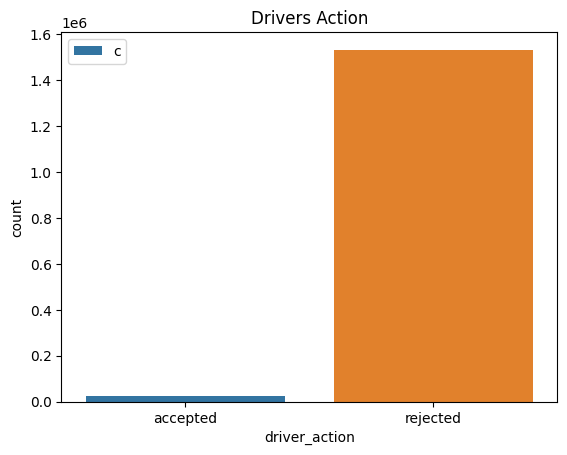

In [81]:
sns.countplot(merge_df['driver_action'])
plt.title('Drivers Action')
plt.legend()